In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

In [2]:
df = pd.read_csv('dataset_Caso_1.csv')
df

,x1,x2,x3,x4,x5,x6,x7,x8,target
0,50.1341,-326.0000,SAT,MZBER,0,0,6,-6.5,0
1,50.1341,-326.0000,SAT,MZBER,0,0,6,-4.5,0
2,124.3276,-275.1935,LCV,MZBER,0,0,3,-2.5,0
3,50.1341,-326.0000,SAT,MZBER,0,0,3,-4.5,0
4,85.3905,-298.8632,XJB,MZBER,0,0,5,-4.5,0
...,...,...,...,...,...,...,...,...,...
1995,119.2548,-283.6687,QKP,MZBER,0,0,3,-2.5,0
1996,106.2410,-294.7023,XJB,YEQA,0,0,3,-2.5,0
1997,127.0572,-295.2308,SAT,MZBER,0,0,3,-5.5,0
1998,114.4653,-290.3312,LCV,MZBER,0,0,3,-5.5,0


In [3]:
df.loc[df.target == 1]

,x1,x2,x3,x4,x5,x6,x7,x8,target
34,122.5341,-310.4000,XJB,PQKE,0,1,3,-5.5,1
88,91.4384,-276.0000,SAT,MZBER,0,0,3,-5.5,1
155,98.2591,-294.7500,LCV,MZBER,0,0,4,-6.5,1
199,87.8699,-288.2642,SAT,MZBER,0,0,3,-6.5,1
245,105.6897,-305.0123,LCV,YEQA,1,0,3,-4.5,1
316,111.4900,-285.3220,XJB,MZBER,1,0,3,-4.5,1
389,126.7885,-295.6691,QKP,MZBER,1,0,3,-2.5,1
435,78.1681,-307.1893,QKP,MZBER,0,0,3,-3.5,1
467,105.6897,-304.9683,XJB,MZBER,0,1,8,-4.5,1
615,128.6151,-286.7595,LCV,MZBER,1,0,3,-3.5,1


<Axes: title={'center': 'Class distribution'}, xlabel='target'>

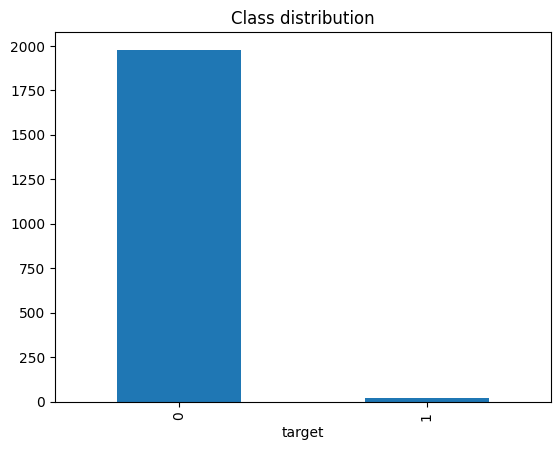

In [4]:
df.pivot_table(index='target', aggfunc='size').plot(kind='bar', title = 'Class distribution')

In [5]:
df.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'target'], dtype='object')

In [6]:
for col in df.columns:
  print(f'{col}: {df[col].unique()}\n')

x1: [ 50.1341 124.3276  85.3905 ... 119.2548 106.241  114.4653]

x2: [-326.     -275.1935 -298.8632 ... -283.6687 -294.7023 -290.3312]

x3: ['SAT' 'LCV' 'XJB' 'QKP']

x4: ['MZBER' 'PQKE' 'YEQA' 'ZUQF']

x5: [0 1]

x6: [0 1]

x7: [6 3 5 4 8]

x8: [-6.5 -4.5 -2.5 -3.5 -5.5 -7.5 -1.5]

target: [0 1]



In [7]:
df.dtypes

x1        float64
x2        float64
x3         object
x4         object
x5          int64
x6          int64
x7          int64
x8        float64
target      int64
dtype: object

In [8]:
df[['x7','x8']] = df[['x7','x8']].astype('category')

In [9]:
df.dtypes

x1         float64
x2         float64
x3          object
x4          object
x5           int64
x6           int64
x7        category
x8        category
target       int64
dtype: object

In [10]:
df[['x1','x2']].describe()

,x1,x2
count,2000.000000,2000.000000
mean,101.074885,-298.282145
std,22.670474,16.596490
min,50.134100,-326.000000
25%,89.501675,-308.930400
50%,105.236100,-297.825600
75%,116.023175,-288.169025
max,150.134100,-226.000000


In [11]:
df[df.target == 1][['x1','x2']].describe()

,x1,x2
count,22.000000,22.000000
mean,107.626577,-295.254577
std,14.237139,10.571798
min,78.168100,-314.349500
25%,99.334650,-304.601225
50%,105.689700,-294.432950
75%,116.025125,-288.400625
max,139.390300,-276.000000


A partir de la observación de los datos, hay varios fenómenos notables:

1.   De los 2000 datos, solo hay 22 con target = 1, es decir, hay pocos datos de un tipo.

2.   De los datos de tipo target = 1, la variable x4 es usualmente x4 = MZBER, hay pocos x4 = PQKE (1) o x4 = YEQA (2), y no hay x4 = ZUQF.

3.   Las variables x1 y x2 son de tipo real, y tienen un rango de 100 unidades. La variable x1 va entre 50.13 y 150.13, y la variable x2 va entre -326 y -226. Los datos con target = 1 poseen variable x2 máxima de -276, es decir, la mitad del rango.

4.   La variable x7 tiene cinco categorías: 3, 4, 5, 6 y 8. Los datos con target = 1 solo presentan tres de estas categorías, la predominante es x7 = 3, seguido de x7 = 6 (2) y por último x7 = 4 (1) y x7 = 8 (1).

5.   La variable x8 tiene 7 categorías, de las cuales en los datos con target = 1 solo hay 5 presentes. Las dos categorías faltantes son x8 = -1.5 y x8 = -7.5.   





# Árbol de decisión

Hay un evidente desbalance en el tipo de los datos (pocos datos con target = 1), hay pocas variables en los datos (solo 8 variables) y algunas categorías de ciertas variables no aparecen en los datos con target = 1, lo cuál indica que pueden ser buenos indicadores para diferenciar el tipo de target.

Dado todo lo anterior, se probará hacer la clasificación binaria utilizando un árbol de decisión.

In [12]:
data = pd.get_dummies(df)#, drop_first=True)

In [13]:
data.columns

Index(['x1', 'x2', 'x5', 'x6', 'target', 'x3_LCV', 'x3_QKP', 'x3_SAT',
       'x3_XJB', 'x4_MZBER', 'x4_PQKE', 'x4_YEQA', 'x4_ZUQF', 'x7_3', 'x7_4',
       'x7_5', 'x7_6', 'x7_8', 'x8_-7.5', 'x8_-6.5', 'x8_-5.5', 'x8_-4.5',
       'x8_-3.5', 'x8_-2.5', 'x8_-1.5'],
      dtype='object')

In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3, stratify=data.target, random_state=42)

In [15]:
X_train = train.drop('target', axis=1)
X_test = test.drop('target', axis=1)

y_train = train.target
y_test = test.target

In [28]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=1, criterion='entropy')

In [29]:
cTree = clf.fit(X_train, y_train)
cTree.classes_

array([0, 1])

In [30]:
prediction = cTree.predict(X_test) 

In [31]:
from sklearn import metrics

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       593
           1       0.33      0.29      0.31         7

    accuracy                           0.98       600
   macro avg       0.66      0.64      0.65       600
weighted avg       0.98      0.98      0.98       600

[[589   4]
 [  5   2]]


In [32]:
y_score_train = cTree.predict_proba(X_train)[:,1]
y_score_test = cTree.predict_proba(X_test)[:,1]

In [33]:
print('AUC train:', metrics.roc_auc_score(y_train, y_score_train))
print('AUC test:', metrics.roc_auc_score(y_test, y_score_test))

AUC train: 1.0
AUC test: 0.6394844615755239
